In [25]:
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from PIL import Image
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential

In [2]:
os.getcwd()

'C:\\Users\\Srija\\OneDrive\\Desktop\\traffic_data'

In [6]:
imgs_path = "C:\\Users\\Srija\\OneDrive\\Desktop\\traffic_data\Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")

Done


In [7]:
data.shape

(39209, 30, 30, 3)

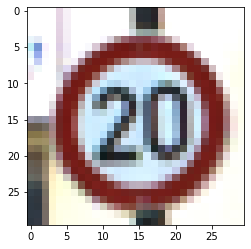

In [10]:
path = r"C:\\Users\\Srija\\OneDrive\\Desktop\\traffic_data\Train\0\00000_00004_00010.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.1, random_state = 10)

In [15]:
x_train.shape

(35288, 30, 30, 3)

In [16]:
y_train.shape

(35288,)

In [17]:
y_train = tf.one_hot(y_train, 43)
y_test = tf.one_hot(y_test, 43)

In [18]:
y_train

<tf.Tensor: shape=(35288, 43), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape= x_train.shape[1:]))
model.add((Conv2D(filters=32, kernel_size=(5,5), activation="relu")))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add((Conv2D(filters=64,kernel_size=(3,3),activation="relu"))) 
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(rate=0.25))
model.add(Flatten()) 
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.40))
model.add(Dense(43, activation="softmax"))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)         

In [31]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [32]:
model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/20
552/552 [==============================] - 67s 117ms/step - loss: 3.7795 - accuracy: 0.0553 - val_loss: 3.4846 - val_accuracy: 0.0571
Epoch 2/20
552/552 [==============================] - 60s 109ms/step - loss: 3.4968 - accuracy: 0.0556 - val_loss: 3.4850 - val_accuracy: 0.0571
Epoch 3/20
552/552 [==============================] - 61s 110ms/step - loss: 3.4951 - accuracy: 0.0561 - val_loss: 3.4839 - val_accuracy: 0.0571
Epoch 4/20
552/552 [==============================] - 60s 110ms/step - loss: 3.4932 - accuracy: 0.0559 - val_loss: 3.4855 - val_accuracy: 0.0612
Epoch 5/20
552/552 [==============================] - 61s 110ms/step - loss: 3.4926 - accuracy: 0.0566 - val_loss: 3.4849 - val_accuracy: 0.0530
Epoch 6/20
552/552 [==============================] - 61s 110ms/step - loss: 3.4911 - accuracy: 0.0559 - val_loss: 3.4845 - val_accuracy: 0.0538
Epoch 7/20
552/552 [==============================] - 61s 110ms/step - loss: 3.4905 - accuracy: 0.0547 - val_loss: 3.4840 - val_ac